# A. The Origin of the Inference Problem...

## A.1 Working with distributions:

1. $Conditional = \frac{Joint}{Marginal}$, namely, $p(x|y) = \frac{p(x,y)}{p(y)}$

2. Product rule: $p(x, y, z) = p(x|y, z)p(y|z)p(z)$

3. Sum rule: $p(y) = \int p(x, y)$

4. Law of total probability: 
- $p(x) = \sum p(x|y)p(y)$
- $p(x) = \int p(x|y)p(y)dy$

---
## A.2 Bayes theorem
 
$Posterior = \frac{Likelihood \cdot Prior}{Evidence (Normalization)}$
$p(y|x) =  \frac{p(x, y)}{p(x)} = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y)dy }$

---
## A.3 Inference with Bayesian framework
### Problem: given i.i.d. data (measurements) $\mathbf{z}=(z_1, ..., z_n)$ from distribution $p(z|\theta)$, $\mathbf{\theta} = ?$
With Bayes theorem:
$p(\theta | z) = \frac{\prod_{i=1}^np(z_i|\theta)p(\theta)}{\int{\prod_{i=1}^np(z_i|\theta)p(\theta)d\theta}}$

Generally, 
- $z$: set of observed variables (measurements, features u.a.)
- $x$: set of hidden / latent variables (system states, parameters, class label, representations etc.)
- $\theta$: model parameters (weights of the linear model)
***
### Type I: Full Bayesian Inference (actually, there is not really a full bayesian inference :D......)
Example from (generative) supervised learning: 

Training: $p(\theta | X_{tr}, Y_{tr}) = \frac{p(Y_{tr}|X_{tr}, \theta)p(\theta)}{\int{p(Y_{tr} | X_{tr}, \theta)p(\theta)d\theta}}$

Testing: $p(y|x, X_{tr}, Y_{tr})=\int{p(y|x, \theta)p(\theta | X_{tr}, Y_{tr})}$

with:
- $X_{tr}$: input data
- $Y_{tr}$: labeled data
- $x$: input data, which was not used for training
- $y$: inference result using trained model with parameter (features) $\theta$


## Where is the problem? 

## How to calculate the Evidence? 
## Can we calculate the Evidence in close form? 

=> In the setting of Full Bayesian Inference, the distribution of posterior can only be calculated in analytical form, <span style='background :yellow' > i.i.f. the $Likelihood$ and $Prior$ are conjugate, OR, if the $Posterori$ belongs to the same parametric family as $Prior$ (definition of confugate distributions). </span>

$p(\theta) \in \mathcal{A}(\alpha)$, $p(z|\theta) \in \mathcal{B}(y)$ ==> $p(\theta | z) \in \mathcal{A}(\alpha')$

Why so? 

=> The Intuition: 

$p(\theta|z) = \frac{p(z|\theta)p(\theta)}{\int p(z|\theta)p(\theta)d\theta} \propto p(z|\theta)p(\theta)$

- Denominator is tractable since any distribution in $\mathcal{A}$ is normalized, because it is a proper probabilistic distribution.
- Actually, the most problems will be solved within MAP, which means no need to calculate normalization...
- All we need is to compute $\alpha'$, (parameterization of $\mathcal{A}$)

=> In this case Bayesian inference can be done in closed form.
***

### Example: coin flipping
- We have a coin which may be fair or not
- The task is to estimate a probability $\theta$ of landing heads up
- Data $X = (x_1, ..., x_n)$, $n \in \{0, 1\}$
***
Probabilistic model: $p(x, \theta) = p(x|\theta)p(\theta)$
We take $Bernoulli$ distribution $p(x|\theta)=\theta^x(1-\theta)^{1-x}$ as $Likelihood$.

<span style='background :red' > How to choose a $Prior$? </span>
Regarding to this problem:
- Correct domain: $\theta \in [0, 1]$
- Include prior knowledge: a coin is most likely fair
- inference complexity: use conjugate prior
***

#### One solution: 

$Beta$-Distribution: $Beta(\theta|a, b) = \frac{1}{B(a,b)\theta^{a-1}(1-\theta)^{b-1}}$

Checking:

- $Likelihood$: $Bernoulli$ distribution $p(z|\theta)=\theta^z(1-\theta)^{1-z}$ 
- $Prior$: $Beta(\theta|a, b) = \frac{1}{B(a,b)\theta^{a-1}(1-\theta)^{b-1}}$ = $C\cdot \theta^\alpha(1-\alpha)^\beta$

While inferencing: 

$p(\theta | z) = C'\cdot p(z|\theta)p(\theta) = C'\cdot \theta^z(1-\theta)^{1-z}\cdot \frac{1}{B(a,b)}\theta^{a-1}(1-\theta)^{b-1}$

=> $p(\theta | z) = C'' \cdot \theta^{\alpha'}(1-\theta)^{\beta'}$ => conjugate to $Prior$ in $Beta$ distribution.



$p(\theta | z) = C'' \cdot \theta^{\alpha'}(1-\theta)^{\beta'}=$ 

$=\frac{1}{Z}\prod_{i=1}^n\theta^{z_i}(1-\theta)^{1-z_i}\frac{1}{N(a,b)}\theta^{a-1}(1-\theta)^{b-1}=$

$=\frac{1}{Z'}\theta^{a+\sum_{i=1}^nz_i-1}(1-\theta)^{b+n-\sum_{i=1}^nz_i-1}==Beta(\theta | a', b')$

New parameters: 
- $a' = a + \sum_{i=1}^nz_i$
- $b' = b+n-\sum_{i=1}^nz_i-1}$

In [1]:
!conda install -c conda-forge mkl-service aesara pymc3 arviz seaborn -y

Solving environment: done

# All requested packages already installed.



/home/haoming/anaconda3/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


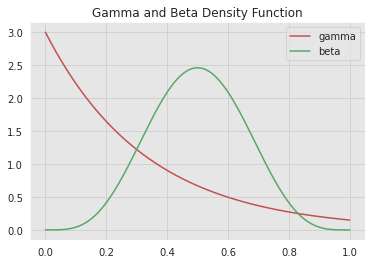

In [1]:
import numpy as np
import arviz as az
import pymc3 as pm
import theano
import scipy.stats as scis
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
x = np.linspace(start=0,stop=1, num=300)


fig, ax = plt.subplots()
ax.plot(x, scis.gamma.pdf(x, a=1, scale=1/3), color=sns_c[3], label='gamma')
ax.plot(x, scis.beta.pdf(x, a=5.0, b=5.0), color=sns_c[2], label='beta')
ax.legend()
ax.set(title=f'Gamma and Beta Density Function');


In [4]:
X1 = theano.shared(np.asarray([
    1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
    0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
    0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
    1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
    0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
    1, 1, 1, 0, 0, 0, 1, 0, 1, 0
]))

with pm.Model() as coin_flipping1:
    p = pm.Beta('p1', alpha=2.0, beta=2.0)
    y = pm.Bernoulli('y1', p=p, observed=X1)
    trace1 = pm.sample(1000, tune=2000, chains=1, cores=4, return_inferencedata=True)
    # reset value to get the shape right
    X1.set_value(np.asarray([0, 0, 0]))
    ppc1 = pm.sample_posterior_predictive(trace1)

X2 = theano.shared(np.asarray([0, 0, 0, 0, 0, 1, 1, 1]))
with pm.Model() as coin_flipping2:
    p = pm.Gamma('p2', alpha=1, beta=3, mu=0.5, sigma=0.5)
    y = pm.Bernoulli('y2', p=p, observed=X2)
    trace2 = pm.sample(1000, tune=2000, chains=1, cores=4, return_inferencedata=True)
    # reset value to get the shape right
    X2.set_value(np.asarray([0, 0, 0]))
    ppc2 = pm.sample_posterior_predictive(trace2)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [p1]


Sampling 1 chain for 2_000 tune and 1_000 draw iterations (2_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [p2]


Sampling 1 chain for 2_000 tune and 1_000 draw iterations (2_000 + 1_000 draws total) took 1 seconds.
There were 59 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


<AxesSubplot:title={'center':'p1'}>

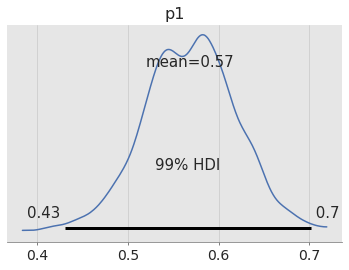

In [5]:
import arviz as az
np.mean(ppc1['y1'].sum(axis=1)==3)
az.plot_posterior(trace1, hdi_prob=0.99)

<AxesSubplot:title={'center':'p2'}>

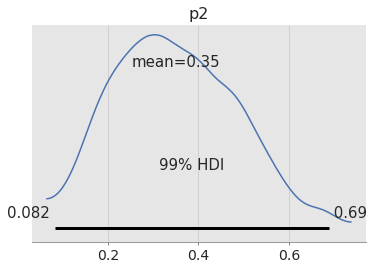

In [6]:
np.mean(ppc2['y2'].sum(axis=1)==3)
az.plot_posterior(trace2, hdi_prob=0.99)

In [31]:
import arviz as az
az.summary(trace1, kind="stats")


,mean,sd,hdi_3%,hdi_97%
p1,0.57,0.049,0.481,0.66


In [32]:
az.summary(trace2, kind="stats")

,mean,sd,hdi_3%,hdi_97%
p2,0.321,0.147,0.082,0.584


## What to do if there is no conjugacy or conjugacy is unknown?

## Simplest way: approximate posterior with

### - Markov Chain Monte Carlo (MCMC)
### - Variational Bayesian Inference (VBI)